In [1]:
# # Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
for coordinate in coordinates:
    print (coordinate[0], coordinate[1])

15.503528127126415 -9.441872161067977
45.36593320705893 -135.87774820318708
55.41832926010812 -149.08376982302826
55.36236780399764 -134.94361539327087
70.98870855210305 -104.21403762159227
-18.258051439363555 -140.54654487784853
67.99299092757417 -12.154836918041525
86.80306055555008 -163.3664031243619
-37.02633721974885 155.91704558255185
-78.99348224356113 -103.70974542798918
1.2645480555544282 -53.96508018965042
-66.16231000907723 132.01439218686835
-82.16560177058237 -8.13719198315269
-3.968096274263573 -24.194360388889464
-81.51414451914259 122.63689979994501
-37.51504784046345 70.67359536269004
84.6396801997625 -86.68688363629653
80.13776594357316 65.30825588390286
10.423758772348208 -114.15095311276453
15.197524104796798 -134.44414276154197
-17.710628861754998 -152.1959965910312
-84.07405980124835 62.32267804814185
-9.690539697326557 125.13699590745006
27.68422808428896 -36.98153941232451
20.679910317920147 18.505791245108213
-12.339932843159133 -105.27470232633016
33.383913544

62.84598124042009 -165.86262831652638
75.63623188022865 -94.33890401097588
-19.843246370951476 -77.9778692721125
2.7980885940797435 178.10231255081385
78.94775758679984 -144.0685399014719
56.9107964471375 -172.20502934435504
-67.33990213682927 -121.64820628180826
81.16238712003576 79.26493168663131
-83.637509985813 -68.87800981738187
-16.94808497309336 1.7545159198941462
-42.96086265770861 48.933368907473266
-46.126142546559656 -51.43591399805459
40.52479109847741 -69.52530087264807
-61.43755056074272 -25.68709549372707
-19.45762620482236 -28.73624754375578
-88.18088336670046 84.8922109626335
-25.932507565693044 146.07509495891748
-73.51729094008543 80.82328388865187
-5.12428653980831 -175.76265428530536
-41.60232363816959 -179.98477758667667
64.47858684268141 -150.73730638746025
-27.634781725314724 -63.38352425739218
-11.040783808132517 -15.222045953105408
53.57078041649888 33.61322668756685
-74.74864814059582 132.49911431356907
-9.612765551172274 -81.11601199691026
36.506700730541965

76.73826393336691 162.43393391342698
31.34836618140939 16.55775919752395
-8.625681495572621 177.01845239278686
4.540235116436051 -27.37351985552118
88.06440107817104 128.86216676704595
-3.5740097806717017 44.53361072191257
53.38128126447512 -133.16947117180976
-10.728896444138172 -47.77468876838
-43.09196405206198 50.023941063096174
65.26798275054452 -25.971658227600102
-67.8815615500173 8.749922648915685
12.037553482422169 176.1177336068285
85.05461459459784 110.25835098820164
50.74316913007027 -95.7710992453883
-26.181855821134015 -72.8703674937771
1.8393297800143387 -77.97942346656684
-6.7298087025843785 154.43823073885767
87.6268933664297 -45.31140655832198
-41.28301432890665 -28.98857157458275
16.9492725514486 -42.86938358152938
-21.44124191981895 -36.98866976930941
40.274685005776576 -117.66669993125434
-21.020314139345658 -72.6279647554274
-12.077907954243969 -95.6919151665176
84.07446618190829 -49.80089445771665
-64.91954503062854 127.61345933337867
-63.37402173657918 160.00013

-74.81476034879348 109.80503817639527
9.890620303279889 142.08838663580747
70.60240670661821 -78.2779904216416
45.28659971217391 142.7287365583918
-55.03243992827527 122.21462572144526
-31.369445186049873 133.56060984676526
-34.744544962629 -93.57101295628382
54.33917978999477 -55.438493821312036
-22.35305008563759 89.15898007135371
-4.201782487459695 75.43229419874027
-57.977230053033345 -103.67415455696069
-13.32016620649398 -144.65006973335895
46.85138418195328 120.63379019964685
75.72862981513148 23.2296483127694
-30.752078010272307 -135.4958948207082
13.942293375830985 -48.4856935764854
11.134584635017575 -102.31397744915458
70.63228475133789 -127.81585900045334
-50.873421935275005 -95.57649310016055
54.30073464991179 -54.15743795537776
-58.22957978911815 -126.62864309100156
22.447245340957537 -170.05134243053843
-35.9358751518903 149.3043887382953
-31.885666588036962 107.5313778455
-87.82942145590812 168.79789155577515
-39.287238136093826 101.17883776362589
37.544993697814604 143

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]). city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

905

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b481dfaa86ffa838b123c2cb999390d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nioro
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | kiama
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | camopi
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | tevaitoa
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | atambu

Processing Record 40 of Set 4 | muros
Processing Record 41 of Set 4 | khani
Processing Record 42 of Set 4 | sept-iles
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | oistins
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | tondano
Processing Record 50 of Set 4 | elat
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | lazaro cardenas
Processing Record 3 of Set 5 | tshane
Processing Record 4 of Set 5 | tamandare
Processing Record 5 of Set 5 | tuyen quang
Processing Record 6 of Set 5 | svetlaya
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | castro
Processing Record 11 of Set 5 | merritt island
Processing Record 12 of Set 5 | dawei
Processing Record 13 of Set 5 | kaitangata
Processing Rec

Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | santiago del estero
Processing Record 29 of Set 8 | zhukovka
Processing Record 30 of Set 8 | santiago de cao
Processing Record 31 of Set 8 | locri
Processing Record 32 of Set 8 | sidi ali
Processing Record 33 of Set 8 | sihora
Processing Record 34 of Set 8 | peace river
Processing Record 35 of Set 8 | susanville
Processing Record 36 of Set 8 | malwan
City not found. Skipping...
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | andros town
Processing Record 39 of Set 8 | pasni
Processing Record 40 of Set 8 | yerbogachen
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | tucupita
Processing Record 44 of Set 8 | tilichiki
Processing Record 45 of Set 8 | dubbo
Processing Record 46 of Set 8 | san isidro
Processing Record 47 of Set 8 | sento se
City not found. Skipping...
Processing Record 48 of Set 8 | berwick
Processing Record 49 of Set 8 | gh

Processing Record 14 of Set 12 | sakakah
Processing Record 15 of Set 12 | smyrna
Processing Record 16 of Set 12 | pangkalanbuun
Processing Record 17 of Set 12 | bouna
Processing Record 18 of Set 12 | torres
Processing Record 19 of Set 12 | athabasca
Processing Record 20 of Set 12 | aykhal
Processing Record 21 of Set 12 | lahti
Processing Record 22 of Set 12 | yichang
Processing Record 23 of Set 12 | kitimat
Processing Record 24 of Set 12 | ambanja
Processing Record 25 of Set 12 | terney
Processing Record 26 of Set 12 | cavalcante
Processing Record 27 of Set 12 | blagoyevo
Processing Record 28 of Set 12 | kampong thum
Processing Record 29 of Set 12 | cairns
Processing Record 30 of Set 12 | praia da vitoria
Processing Record 31 of Set 12 | toungoo
City not found. Skipping...
Processing Record 32 of Set 12 | sungairaya
Processing Record 33 of Set 12 | springfield
Processing Record 34 of Set 12 | payo
Processing Record 35 of Set 12 | vardo
Processing Record 36 of Set 12 | las vegas
Process

Processing Record 47 of Set 15 | alberton
Processing Record 48 of Set 15 | altamira
Processing Record 49 of Set 15 | dickinson
Processing Record 50 of Set 15 | talcahuano
Processing Record 1 of Set 16 | obzor
Processing Record 2 of Set 16 | ewa beach
Processing Record 3 of Set 16 | dunedin
Processing Record 4 of Set 16 | saint-georges
Processing Record 5 of Set 16 | chiredzi
Processing Record 6 of Set 16 | gizo
Processing Record 7 of Set 16 | kieta
Processing Record 8 of Set 16 | mae sai
Processing Record 9 of Set 16 | tagusao
Processing Record 10 of Set 16 | puerto madryn
Processing Record 11 of Set 16 | umm jarr
City not found. Skipping...
Processing Record 12 of Set 16 | samfya
Processing Record 13 of Set 16 | pamanukan
Processing Record 14 of Set 16 | mrirt
City not found. Skipping...
Processing Record 15 of Set 16 | bubaque
Processing Record 16 of Set 16 | port macquarie
Processing Record 17 of Set 16 | tahoua
Processing Record 18 of Set 16 | jaguey grande
Processing Record 19 of 

In [32]:
len(city_data)

817

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nioro,13.3500,-15.7500,94.50,10,46,11.59,GM,2021-02-07 16:49:30
1,Port Hardy,50.6996,-127.4199,39.20,93,75,5.75,CA,2021-02-07 16:47:21
2,Kodiak,57.7900,-152.4072,26.60,63,1,4.61,US,2021-02-07 16:47:24
3,Sitka,57.0531,-135.3300,28.40,64,75,3.44,US,2021-02-07 16:49:30
4,Yellowknife,62.4560,-114.3525,-49.00,65,1,4.61,CA,2021-02-07 16:47:20
5,Rikitea,-23.1203,-134.9692,77.27,72,95,11.77,PF,2021-02-07 16:44:50
6,Hofn,64.2539,-15.2082,36.59,83,100,17.83,IS,2021-02-07 16:49:31
7,Barrow,71.2906,-156.7887,-20.20,69,75,10.36,US,2021-02-07 16:49:31
8,Kiama,-34.6833,150.8667,66.00,80,92,1.99,AU,2021-02-07 16:49:31
9,Punta Arenas,-53.1500,-70.9167,62.60,34,0,12.66,CL,2021-02-07 16:45:12


In [13]:
# rearrange the column
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nioro,GM,2021-02-07 16:49:30,13.3500,-15.7500,94.50,10,46,11.59
1,Port Hardy,CA,2021-02-07 16:47:21,50.6996,-127.4199,39.20,93,75,5.75
2,Kodiak,US,2021-02-07 16:47:24,57.7900,-152.4072,26.60,63,1,4.61
3,Sitka,US,2021-02-07 16:49:30,57.0531,-135.3300,28.40,64,75,3.44
4,Yellowknife,CA,2021-02-07 16:47:20,62.4560,-114.3525,-49.00,65,1,4.61
...,...,...,...,...,...,...,...,...,...
812,Billerbeck,DE,2021-02-07 16:51:10,51.9667,7.3000,21.99,80,100,3.00
813,Beloha,MG,2021-02-07 16:51:10,-25.1667,45.0500,77.23,81,23,9.91
814,Barreirinhas,BR,2021-02-07 16:51:10,-2.7469,-42.8264,87.87,59,27,12.15
815,Novaya Igirma,RU,2021-02-07 16:51:10,57.1334,103.9112,21.81,95,100,8.43


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

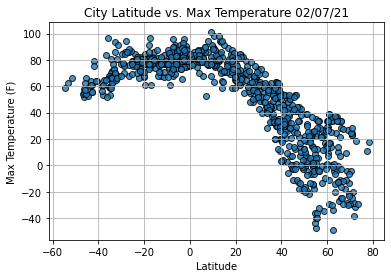

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

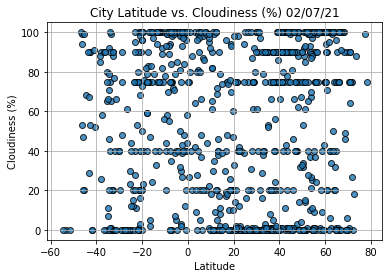

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

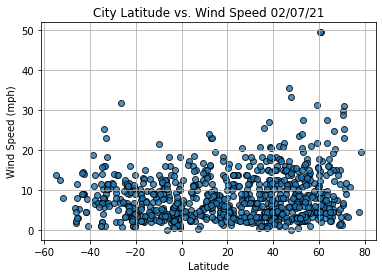

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [20]:
index0 = city_data_df.loc[0]
index0

City                        Nioro
Country                        GM
Date          2021-02-07 16:49:30
Lat                         13.35
Lng                        -15.75
Max Temp                     94.5
Humidity                       10
Cloudiness                     46
Wind Speed                  11.59
Name: 0, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nioro,GM,2021-02-07 16:49:30,13.3500,-15.7500,94.50,10,46,11.59
1,Port Hardy,CA,2021-02-07 16:47:21,50.6996,-127.4199,39.20,93,75,5.75
2,Kodiak,US,2021-02-07 16:47:24,57.7900,-152.4072,26.60,63,1,4.61
3,Sitka,US,2021-02-07 16:49:30,57.0531,-135.3300,28.40,64,75,3.44
4,Yellowknife,CA,2021-02-07 16:47:20,62.4560,-114.3525,-49.00,65,1,4.61
...,...,...,...,...,...,...,...,...,...
810,Vestmannaeyjar,IS,2021-02-07 16:51:09,63.4427,-20.2734,37.40,75,40,27.63
811,Tetela De Ocampo,MX,2021-02-07 16:51:10,19.8167,-97.8000,67.35,49,60,3.67
812,Billerbeck,DE,2021-02-07 16:51:10,51.9667,7.3000,21.99,80,100,3.00
815,Novaya Igirma,RU,2021-02-07 16:51:10,57.1334,103.9112,21.81,95,100,8.43


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

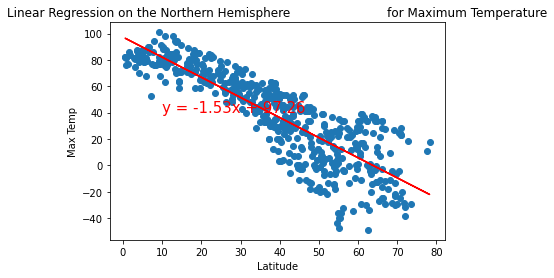

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))

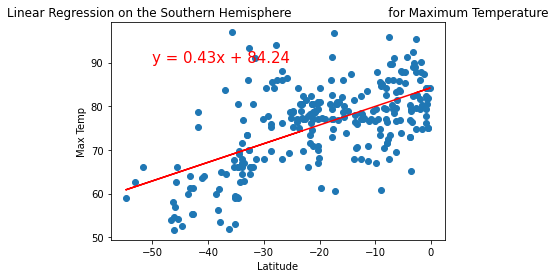

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

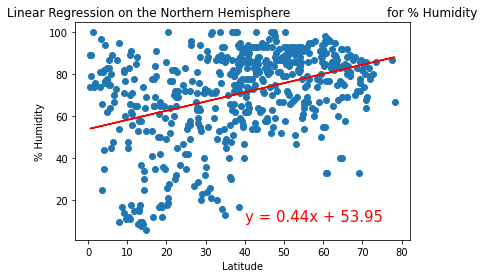

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

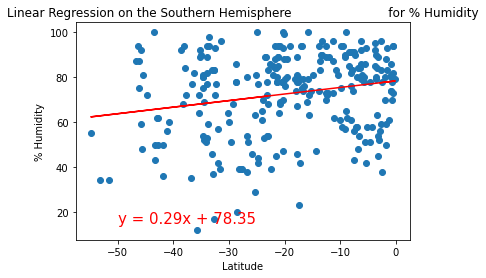

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

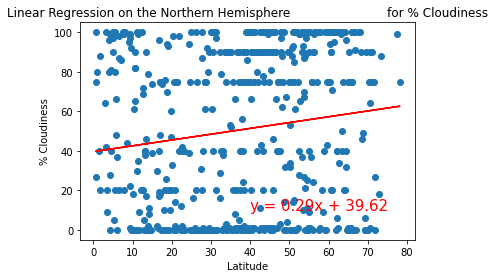

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

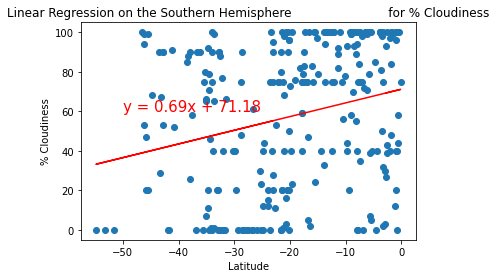

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [29]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
# print(f"The p-value is: {p_value:.3f}")
print(r_value)

0.24910441137587014


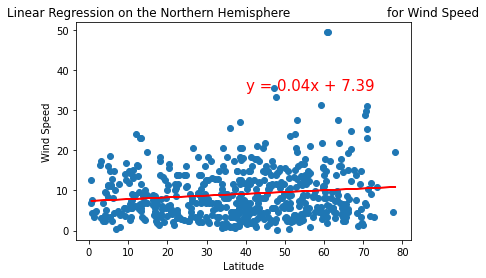

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

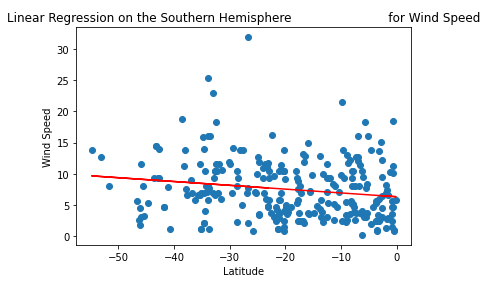

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))